# Common Interview Questions

Here, I answer questions from published [here](https://huyenchip.com/ml-interviews-book/contents/) in preparation for my interviews.

## Vectors

1. Dot product
   1. [E] What’s the geometric interpretation of the dot product of two vectors?
   2. [E] Given a vector , find vector of unit length such that the dot product of u and v is maximum.
2. Outer product
   1. [E] Given two vectors a=[3,2,1] and b=[-1,0,1]. Calculate the outer product $a^T b$?
   2. [M] Give an example of how the outer product can be useful in ML.
   3. [E] What does it mean for two vectors to be linearly independent?
3. [M] Given two sets of vectors $A = a_1, a_2, ..., a_n$ and $B = b_1, b_2, ..., b_n$. How do you check that they share the same basis?
4. [M] Given n vectors, each of d dimensions. What is the dimension of their span?
5. Norms and metrics
   1. [E] What's a norm? What is $L_0, L_1, L_2, L_{norm}$?
   2. [M] How do norm and metric differ? Given a norm, make a metric. Given a metric, can we make a norm?

1.1 Dot product finds the length of the projection of x onto y



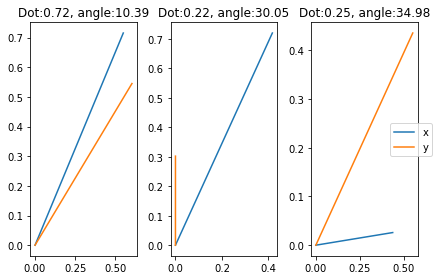

1.2 The maximum dot product is found when the lines are parallel.

2.1 Calculate elementwise product (notated with "X⊗Y")

x [3 2 1]
y [-1  0  1]
X⊗Y = [[-3  0  3]
 [-2  0  2]
 [-1  0  1]]
2.2 Cross products can be used to analyze pairwise correlations

3. Linearly independent vectors have dot(x,y)=0 because angle=90. In terms of eigenvectors/eigenvalues, if the eigenvalue of the matrix is zero, the eigenvector is linearly dependent.

Dependent:  [[0 1 1 0]]
4. 
5. 


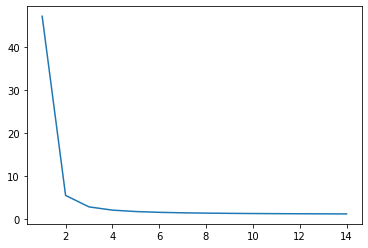

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print("""1.1 Dot product finds the length of the projection of x onto y
""")

num_iter = 3

fig, axs = plt.subplots(1,num_iter)
for seed, ax in zip(range(num_iter), axs):
    np.random.seed(seed)
    
    n=2
    x = np.random.uniform(0,1,n)
    y = np.random.uniform(0,1,n)

    # Dot product finds the length of the projection of x onto y
    dot = np.sum(x.T*y) # or  np.dot(x,y)

    x_mag = np.sqrt(np.sum(np.square(x)))
    y_mag = np.sqrt(np.sum(np.square(y)))
    angle = np.arccos(dot / (x_mag * y_mag)) * 360 / (2 * np.pi)

    ax.plot([0,x[0]], [0,x[1]], label='x')
    ax.plot([0,y[0]], [0,y[1]], label='y')
    ax.set_title(f"Dot:{round(dot,2)}, angle:{round(angle,2)}")

handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='center right')
plt.tight_layout()
plt.show()

print("""1.2 The maximum dot product is found when the lines are parallel.
""")


print("""2.1 Calculate elementwise product (notated with "X⊗Y")
""")
x = np.array([3,2,1])
y = np.array([-1,0,1])
print('x', x), print('y', y)
print('X⊗Y =', np.multiply.outer(x.T,y))

print("""2.2 Cross products can be used to analyze pairwise correlations
""")

print("""3. Linearly independent vectors have dot(x,y)=0 because angle=90. In terms of eigenvectors/eigenvalues, if the eigenvalue of the matrix is zero, the eigenvector is linearly dependent.
""")

import numpy as np

matrix = np.array(
    [
        [0, 1 ,0 ,0],
        [0, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]
    ])

lambdas, V =  np.linalg.eig(matrix.T)
# The linearly dependent row vectors 
print("Dependent: ", matrix[lambdas == 0,:])

print("4. ")

print("5. ")

x = np.random.uniform(0,1,100)
    
ps = list(range(1,15))
vals = []
for p in ps:
    vals.append(np.sum(x**p)**(1/p))

plt.plot(ps,vals)
plt.show()


Summary of ML implementations on Kaggle: https://www.kaggle.com/shivamb/data-science-glossary-on-kaggle
